# English Premier League(2020-21)
**Statistics of EPL 2020-21 season Players**<br><br>

Below you can see my analysis of the English Premier League (EPL) from season 2020-21.**<br> 

**Dataset details here:**
- Dataset Source: https://www.kaggle.com/rajatrc1705/english-premier-league202021<br><br>


### Context:


This dataset is a collection of basic but crucial stats of the English Premier League 2020-21 season. The dataset has all the players that played in the EPL and their standard stats such as Goals, Assists, xG (Expected Goals), xA (Expected Assists), Passes Attempted, Pass Accuracy and more!

### Content (dataset columns):
**Position:**	Each player has a certain position, in which he plays regularly. The position in this dataset are, FW - Forward, MF - Midfield, DF - Defensive, GK - Goalkeeper<br>
**Starts:**	The number of times the player was named in the starting 11 by the manager.<br>
**Mins:**	The number of minutes played by the player.<br>
**Goals:**	The number of Goals scored by the player.<br>
**Assists:**	The number of times the player has assisted other player in scoring the goal.<br>
**Passes_Attempted:**	The number of passes attempted by the player.<br>
**PercPassesCompleted:**	The number of passes that the player accurately passed to his teammate.<br>
**xG:**	Expected number of goals from the player in a match.<br>
**xA:**	Expected number of assists from the player in a match.<br>
**Yellow_Cards:**	The players get a yellow card from the referee for indiscipline, technical fouls, or other minor fouls.<br>
**Red Cards:**	The players get a red card for accumulating 2 yellow cards in a single game, or for a major foul.<br><br>

On the begining I determined basics what I would like to know (first goals). During the analysis I have checked some more data.<br>

### Objectives:

1. Number of yellow and red cards
1. Total number of cards within nationality
1. Number of cards per 1 player within nationality
1. Number of cards per 1 player within position
1. Amount of goals and assists
1. Scored goals - TOP 10 players
1. Assists - TOP 10 players
1. Canadian points - TOP 10 players
1. Goals by position on field
1. Assists by position on field
1. Amount of not scored goals - based on xG factor
1. Expected goal
1. Passes attempted - TOP 10 players
1. Accurate passes attempted 
1. The oldest players
1. The youngest players
1. Average age by position on field
1. Average age in EPL clubs
1. Amount of nationalities Premier League clubs

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('./EPL_20_21/EPL_20_21.csv')
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [10]:
# lets display the total non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

As we can see we have a total of 18 columns numbered from 0 to 17, and we have 532 entries in total
We can also see that all the entries (in each column) are non null because they match the total entries - 532

In [15]:
# lets use the describe to get some summary statistics about our dataset
df.describe()
# the describe function only works on numeric columns eg ints and floats

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [17]:
# lets find if we have null values though just to be sure - verifications
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [19]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [20]:
# lets make 2 new columns, the minutes per match and goals per match
# should be equal to the total number of minutes divided by the matches
df['MinsPerMatch'] = (df['Mins']/df['Matches']).astype(int)
df['GoalsPerMatch'] = (df['Goals']/df['Matches']).astype(float)
df.head(10)

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250
5,César Azpilicueta,Chelsea,ESP,DF,30,26,24,2188,1,2,2015,87.5,0,0,0.03,0.11,5,1,84,0.038462
6,N'Golo Kanté,Chelsea,FRA,MF,29,30,24,2146,0,2,1504,86.6,0,0,0.04,0.05,7,0,71,0.000000
7,Jorginho,Chelsea,ITA,MF,28,28,23,2010,7,1,1739,89.5,7,9,0.31,0.09,2,0,71,0.250000
8,Thiago Silva,Chelsea,BRA,DF,35,23,23,1935,2,0,1871,93.5,0,0,0.05,0.02,5,1,84,0.086957
9,Kurt Zouma,Chelsea,FRA,DF,25,24,22,2029,5,0,1720,91.9,0,0,0.08,0.00,3,0,84,0.208333


In [28]:
# lets calculate the total goals that were scored in the 20-21 EPL season
total_goals = df['Goals'].sum()
print('Total goals in the 20-21 EPL season:  {}'.format(total_goals))

Total goals in the 20-21 EPL season:  986


In [29]:
# lets calculate the total penalty goals that were scored in the 20-21 EPL season 
total_penalty = df['Penalty_Goals'].sum()
print('Total goals from penalties in the 20-21 EPL season:  {}'.format(total_penalty))

Total goals from penalties in the 20-21 EPL season:  102


In [31]:
# lets calculate the total penalty goals that were scored in the 20-21 EPL season 
total_pen_attempted = df['Penalty_Attempted'].sum()
print('Total number of penalties attempted in the 20-21 EPL season:  {}'.format(total_pen_attempted))

Total number of penalties attempted in the 20-21 EPL season:  125


lets plot a pie chart for penalties missed vs scored 


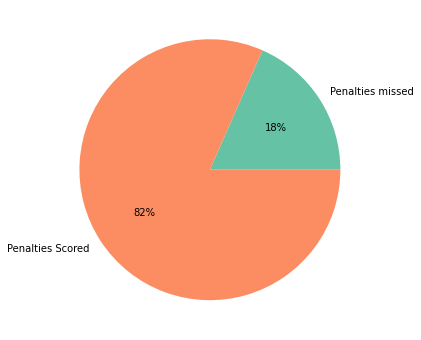

In [34]:
plt.figure(figsize=(13,6))
plt_not_scored = df["Penalty_Attempted"].sum() - total_penalty
data = [plt_not_scored,total_penalty]
labels = ['Penalties missed', 'Penalties Scored']
color = sns.color_palette('Set2')
# autopct enables you to display the percentage value using python string formating
plt.pie(data, labels=labels, colors=color, autopct='%.0f%%')
plt.show()

We can see that 82% of penalties were scored while 18% were missed

Lets find now the total unique positions for which each of the players play for - this will tell us how many unique positions there are.

In [35]:
df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [37]:
df['Position'].nunique()

10

lets now find how many FW position players we have in this dataset

In [39]:
df[df['Position'] == 'FW'] 

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalsPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


81 rows therefore 81 players play in the EPL in the FW position

lets now find the players from different nations 

what are the total number of nations players come from

In [41]:
np.size((df['Nationality'].unique()))

59

Question: From which nation come most players?

In [43]:
nationality = df.groupby('Nationality').size().sort_values(ascending=False)
nationality

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
POR     21
SCO     20
NED     16
WAL     12
BEL     11
GER      9
ARG      8
CIV      8
NGA      7
DEN      6
SUI      6
USA      6
SEN      5
EGY      5
COL      5
SWE      5
TUR      5
GHA      5
POL      5
NIR      5
ITA      5
SRB      4
AUS      4
NOR      3
ALG      3
JAM      3
CZE      3
ISL      3
RSA      2
COD      2
CRO      2
MAR      2
GAB      2
SVK      2
PAR      2
CMR      2
UKR      2
JPN      2
MLI      2
CAN      1
URU      1
BFA      1
AUT      1
BIH      1
KOR      1
SKN      1
GRE      1
NZL      1
GUI      1
IRN      1
MTN      1
MKD      1
MEX      1
ZIM      1
dtype: int64

In [44]:
nationality.head()

Nationality
ENG    192
FRA     31
BRA     27
ESP     26
IRL     21
dtype: int64

<AxesSubplot:xlabel='Nationality'>

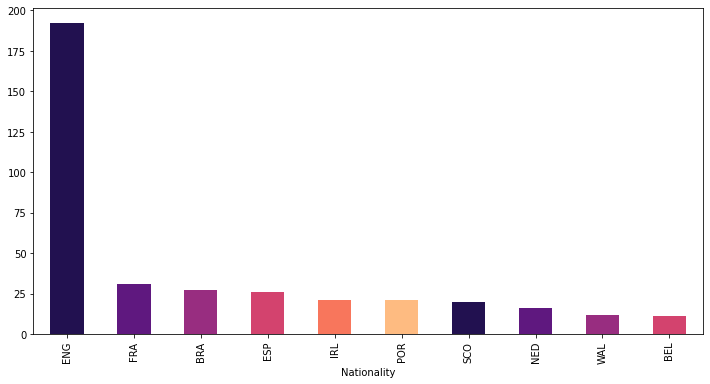

In [45]:
nationality.head(10).plot(kind='bar', figsize=(12,6), color = sns.color_palette('magma'))

So as we can see most of the players are from England (192) then France (31) and then Brazil (27).

Question: Find the clubs with the most players in their squad

<AxesSubplot:>

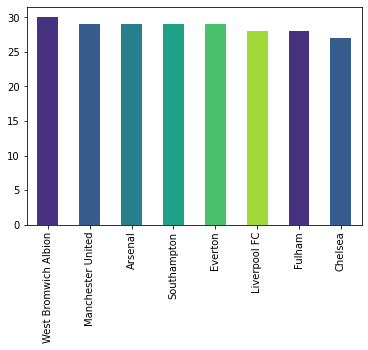

In [47]:
df['Club'].value_counts().nlargest(8).plot(kind='bar', color=sns.color_palette('viridis'))

We have West Browmwich Albion which had 30 players in the sport then Manchester United together with Arsenal Southampton and Everton - 29.

Question: Find the clubs with the least players in their squad

<AxesSubplot:>

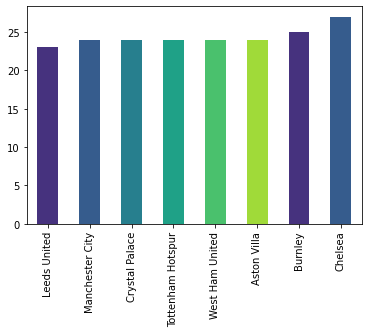

In [48]:
df['Club'].value_counts().nsmallest(8).plot(kind='bar', color=sns.color_palette('viridis'))

As we can see, Leeds United had 23 players followed by MC, CP, Tottenham and WHU with 24 players.

Question: Can you split the players based on the age group?

under 21, 21-25, 

In [61]:
under20 = df[df['Age'] <= 20]
age21_25 = df[(df['Age'] > 20) & (df['Age'] <= 25)]
age26_30 = df[(df['Age'] > 25) & (df['Age'] <= 30)]
above30 = df[df['Age'] > 30]
 

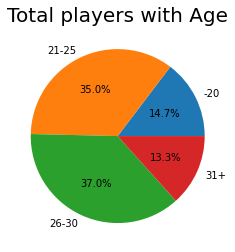

In [64]:
x = np.array([under20['Name'].count(), age21_25['Name'].count(), age26_30['Name'].count(), above30['Name'].count()])
mylabels = ['-20', '21-25', '26-30', '31+']
plt.title('Total players with Age', fontsize = 20)
plt.pie(x, labels = mylabels, autopct="%.1f%%")
plt.show()